# Data overview

In [13]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from openpyxl import Workbook


# Libraries for Model 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [14]:
df=pd.read_csv("Titanic-Dataset.csv")

In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Create a column that join two columns

In [17]:
# Create "Family Size" feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

#Change the datatybe of "FamilySize"
df['FamilySize'] = df['FamilySize'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


### Check dublicated values

In [18]:
df.duplicated().sum()

np.int64(0)

### Sum missing values

In [19]:
missing_values=df.isnull().sum()
missing_values[missing_values >0]

Age         177
Cabin       687
Embarked      2
dtype: int64

### Drop the 'Cabin' column

In [20]:
df=df.drop(columns=['Cabin'])

# Data Preprocessing

### Fill the missing values by Mean & Mode

In [21]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())

### Find and Capping oultliers

In [22]:
def find_outliers_columns(df_clean):
    outliers_columns = []
    for column in df.select_dtypes(include=[np.number]):
        q1 = df_clean[column].quantile(0.25)
        q3 = df_clean[column].quantile(0.75)
        IQR = q3 - q1
        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR
        if ((df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)).any():
            outliers_columns.append(column)
    return outliers_columns



outliers_columns_list = find_outliers_columns(df)
print("Columns with outliers:", outliers_columns_list)

Columns with outliers: ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']


In [23]:
#Capping outliers in columns
def cap_outliers(df_clean, column):
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean[column] = np.where(df_clean[column] > upper_bound, upper_bound, df_clean[column])
    df_clean[column] = np.where(df_clean[column] < lower_bound, lower_bound, df_clean[column])
    return df_clean



columns_to_check = ['Age','FamilySize','SibSp','Parch', 'Fare']


for col in columns_to_check:
    df = cap_outliers(df, col)

df.describe()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.0,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.376817,0.426487,0.0,24.046813,1.664983
std,257.353842,0.486592,0.836071,12.062035,0.708246,0.0,20.481625,0.914151
min,1.000000,0.000000,1.000000,2.500000,0.000000,0.0,0.000000,1.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.0,7.910400,1.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.0,14.454200,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.0,31.000000,2.000000
max,891.000000,1.000000,3.000000,54.500000,2.500000,0.0,65.634400,3.500000


### Visulazie The outliers

In [24]:
# # List of columns to plot
# columns = ['Age', 'Fare','FamilySize','Parch','SibSp']

# # Loop through each column and create a boxplot
# for column in columns:
#     plt.boxplot(df[column])
#     plt.title(f'Boxplot of {column}')
#     plt.show()

### Create a new Exel File after we edit on the dataSet

In [25]:
df_clean = pd.DataFrame(df)

df_clean.to_excel('Titanic-Dataset-new.xlsx', index=False)

print("Excel file created successfully!")

Excel file created successfully!


### Encoding The 'Object DataType' Values

In [26]:
# Identify and encode non-numeric columns
le = LabelEncoder()


df['Name']=le.fit_transform(df['Name'])
df['Sex'] = le.fit_transform(df['Sex'])
df['Ticket'] = le.fit_transform(df['Ticket'])

df['Embarked'] = le.fit_transform(df['Embarked'])


df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  FamilySize   891 non-null    float64
dtypes: float64(5), int64(7)
memory usage: 83.7 KB


In [27]:
x = df.drop(['Survived'] , axis = 1)

y = df['Survived']

print(x.shape, y.shape)

(891, 11) (891,)


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)


C:\Users\abdelfatah.abdullah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {(accuracy*100):.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 77.09

Confusion Matrix:
[[92 16]
 [25 46]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       108
           1       0.74      0.65      0.69        71

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179



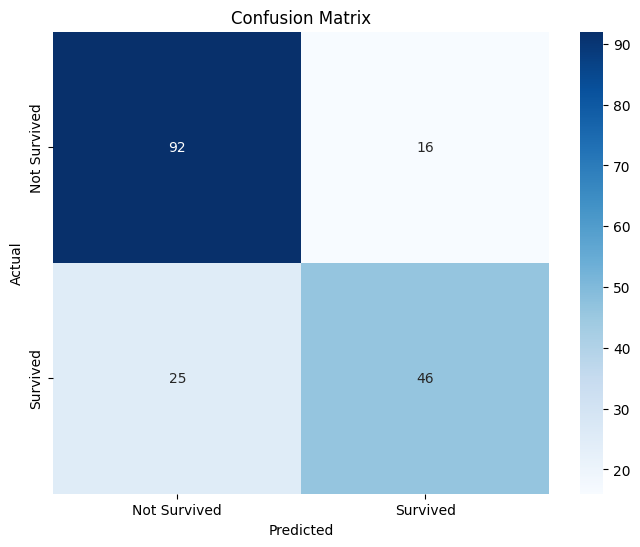

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming `y_test` and `y_pred` are defined from the logistic regression model
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
